<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Decision_Trees(Assignment2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2)  We are given with the dataset of Company_data.
# We are required to plot a decision tree to classify the data.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [ ]:
# Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
# Reading the dataset

In [ ]:
cd = pd.read_csv('Company_Data.csv')
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


 Label Encoding for categorical data items.
 
 We can see that ShelveLoc , Urban , US are categorical datas.
 
 So,we need to apply the LabelEncoder to those columns.

In [ ]:
# Applying LabelEncoder Function

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
cd['ShelveLoc1'] = label_encoder.fit_transform(cd['ShelveLoc'])
cd['Urban1'] = label_encoder.fit_transform(cd['Urban'])
cd['US1'] = label_encoder.fit_transform(cd['US'])

In [ ]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc1,Urban1,US1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1,1,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,2,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2,1,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,1


In [ ]:
# Seperating Independent and Dependent variables.

In [ ]:
x = cd.iloc[:,[0,1,2,3,4,5,7,8,11,12,13]]
y = cd.iloc[:,13] 

In [ ]:
# Aplying the train test function on the dependent and independent variables

# x  -  independent variable

# y  -  dependent variable

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 11) (80, 11) (320,) (80,)


 Building Model of Decision Tree 

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

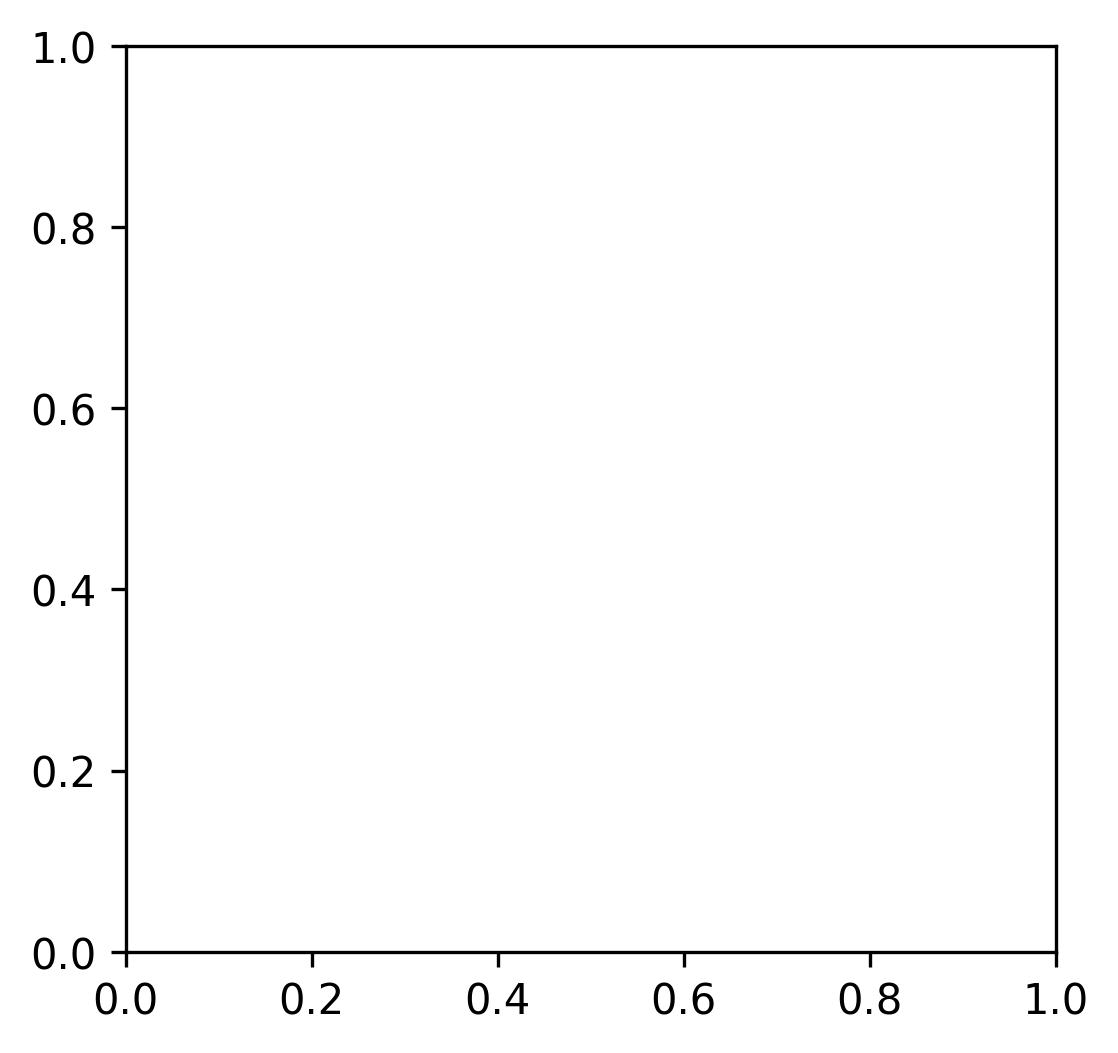

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)

[Text(0.5, 0.75, 'X[10] <= 0.5\nentropy = 0.919\nsamples = 320\nvalue = [107, 213]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 213\nvalue = [0, 213]')]

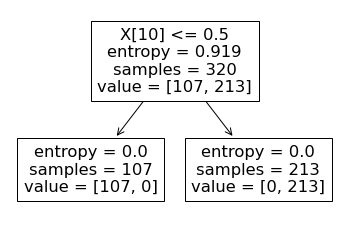

In [ ]:
tree.plot_tree(model)

In [ ]:
# Finding the accuracy

In [ ]:
model.score(x_train,y_train)

1.0

In [ ]:
model.score(x_test,y_test)

1.0

In [ ]:
# Feature Extraction

In [ ]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
10,US1,1.0
0,Sales,0.0
1,CompPrice,0.0
2,Income,0.0
3,Advertising,0.0
4,Population,0.0
5,Price,0.0
6,Age,0.0
7,Education,0.0
8,ShelveLoc1,0.0


Conclusion

In this Decision Tree Classifier Problem, we see that the 'US column' has higher importance in deciding the scale of the production.

i.e

A factor which indicates whether the cloth manufacturing company is in the 'US' or not is the most important feature (or) deciding factor that causes a high scale production in the cloth manufacturing company.